# import

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리


In [201]:
test5 = pd.read_csv('2018_2021_전처리_최종.csv')
test5.round(2)

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,10534264.00,2.85,-1.16,-0.74,-1.88,0.0,320,290,1.4,290,0.0,0.0,0.0,38.0,1,0,4,1,1,421.0
1,12237724.00,2.94,-1.15,0.31,-1.74,0.0,270,290,1.8,290,0.0,0.0,0.0,32.0,0,1,4,1,2,820.0
2,12312633.00,3.38,-1.19,-1.03,-1.35,0.0,320,270,2.2,290,0.0,0.0,0.0,32.0,0,2,4,1,3,839.0
3,12368761.00,3.46,-1.19,-1.26,-1.19,0.0,320,320,1.4,290,0.0,0.0,0.0,40.0,0,3,4,1,4,749.0
4,12368042.00,3.00,-1.12,-0.57,-0.89,0.0,250,270,1.7,290,0.0,0.0,0.0,46.0,0,4,4,1,5,878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,475550.14,3.89,-1.15,-1.57,-0.06,0.0,340,20,1.7,50,0.0,0.0,0.0,33.0,0,0,4,12,27,3517.0
1457,477997.80,3.13,-1.01,-1.74,1.34,0.0,50,50,2.2,50,0.0,0.0,0.0,60.0,0,1,4,12,28,4214.0
1458,478029.06,2.20,-0.86,1.53,1.00,0.2,270,270,2.6,50,0.3,0.3,1.0,70.0,0,2,4,12,29,4126.0
1459,476656.88,3.20,-1.15,2.36,-0.80,0.0,320,290,3.3,270,0.0,0.0,0.0,30.0,0,3,4,12,30,3883.0


# LinearReuniquession, Ridge, Lasso

In [202]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [203]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [204]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [205]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred =ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred =lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lr_reg MSE:  3142739.0397206172, RMSE: 1772.777210966064, R2: 0.6594483074574228
ridge_reg MSE: 3143684.810886063, RMSE: 1773.0439393557238, R2: 0.6593458223426614
lasso_reg MSE: 3142851.8531083856, RMSE: 1772.809028944851, R2: 0.6594360828375416


In [206]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>2]
skew_features_top.sort_values(ascending=False)

일최심신적설            12.166799
일최심적설              8.847381
일강수량               5.001375
일 미세먼지 농도(㎍/㎥)     3.246978
dtype: float64

In [207]:
# 왜곡도 2 이상은 로그로 변환
# test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index]+2)
np.log1p(test5[skew_features_top.index])

,일강수량,일최심적설,일최심신적설,일 미세먼지 농도(㎍/㎥)
0,0.000000,0.000000,0.000000,3.663562
1,0.000000,0.000000,0.000000,3.496508
2,0.000000,0.000000,0.000000,3.496508
3,0.000000,0.000000,0.000000,3.713572
4,0.000000,0.000000,0.000000,3.850148
...,...,...,...,...
1456,0.000000,0.000000,0.000000,3.526361
1457,0.000000,0.000000,0.000000,4.110874
1458,0.182322,0.262364,0.262364,4.262680
1459,0.000000,0.000000,0.000000,3.433987


In [208]:
test5.isna().sum()

총생활인구수            0
기온                0
기압                0
풍속                0
운량                0
일강수량              0
최대순간풍속풍향          0
최대풍속풍향            0
평균풍속              0
최다풍향              0
일최심적설             0
일최심신적설            0
강수여부              0
일 미세먼지 농도(㎍/㎥)    0
휴일여부              0
요일                0
계절                0
month             0
day               0
영등포구              0
dtype: int64

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

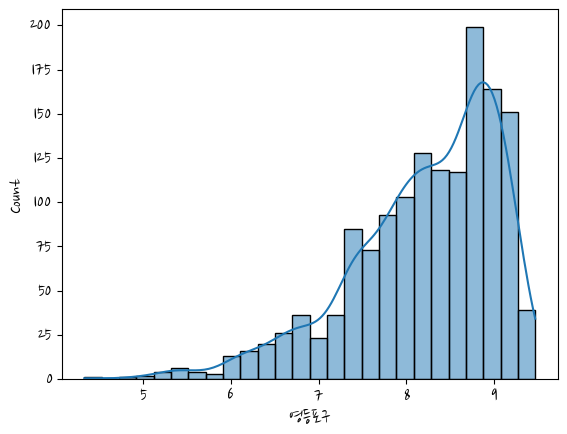

In [209]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [210]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [213]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lr_reg MSE:  0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984


In [212]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred =ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg MSE: 0.1637829522039319, RMSE: 0.40470106523696214, R2: 0.7604429276701705


In [198]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred =lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lasso_reg MSE: 0.4938316977426677, RMSE: 0.7027315972280368, R2: 0.27769725638110276


In [199]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

586.0000000000002, 2049.6264938473405
6748.999999999997, 4740.298287581174
9834.000000000007, 4370.260293745217
3671.9999999999977, 4733.624827424794
5590.0, 5452.4975045033225
7018.0000000000055, 5594.736531883838
8853.999999999996, 4530.722762193504
5968.000000000004, 3887.230791845207
3804.9999999999986, 1880.7981738111673
1807.9999999999995, 3632.8187656543314
8075.000000000005, 4876.230516839042
7847.0000000000055, 4719.571567877114
5581.999999999997, 6121.147380737008
10826.999999999998, 4478.391304092979
7369.0, 5112.861876525352
9038.999999999998, 4733.259629699614
3871.0000000000027, 4975.454849486151
4944.000000000003, 4836.080229652755
2410.999999999999, 4259.506779356278
2441.0, 1881.6988071163687
11707.00000000001, 5907.961067757648
9245.0, 4474.375277923163
455.00000000000017, 2075.9418522766005
5853.000000000004, 5289.361637586112
1329.0000000000002, 4187.211472413566
3141.0000000000005, 4581.274325358885
6975.000000000002, 5491.758547202577
930.0000000000001, 4513.37387

586.0000000000002, 2049.6264938473405
6748.999999999997, 4740.298287581174
9834.000000000007, 4370.260293745217
3671.9999999999977, 4733.624827424794
5590.0, 5452.4975045033225
7018.0000000000055, 5594.736531883838
8853.999999999996, 4530.722762193504
5968.000000000004, 3887.230791845207
3804.9999999999986, 1880.7981738111673
1807.9999999999995, 3632.8187656543314
8075.000000000005, 4876.230516839042
7847.0000000000055, 4719.571567877114
5581.999999999997, 6121.147380737008
10826.999999999998, 4478.391304092979
7369.0, 5112.861876525352
9038.999999999998, 4733.259629699614
3871.0000000000027, 4975.454849486151
4944.000000000003, 4836.080229652755
2410.999999999999, 4259.506779356278
2441.0, 1881.6988071163687
11707.00000000001, 5907.961067757648
9245.0, 4474.375277923163
455.00000000000017, 2075.9418522766005
5853.000000000004, 5289.361637586112
1329.0000000000002, 4187.211472413566
3141.0000000000005, 4581.274325358885
6975.000000000002, 5491.758547202577
930.0000000000001, 4513.37387

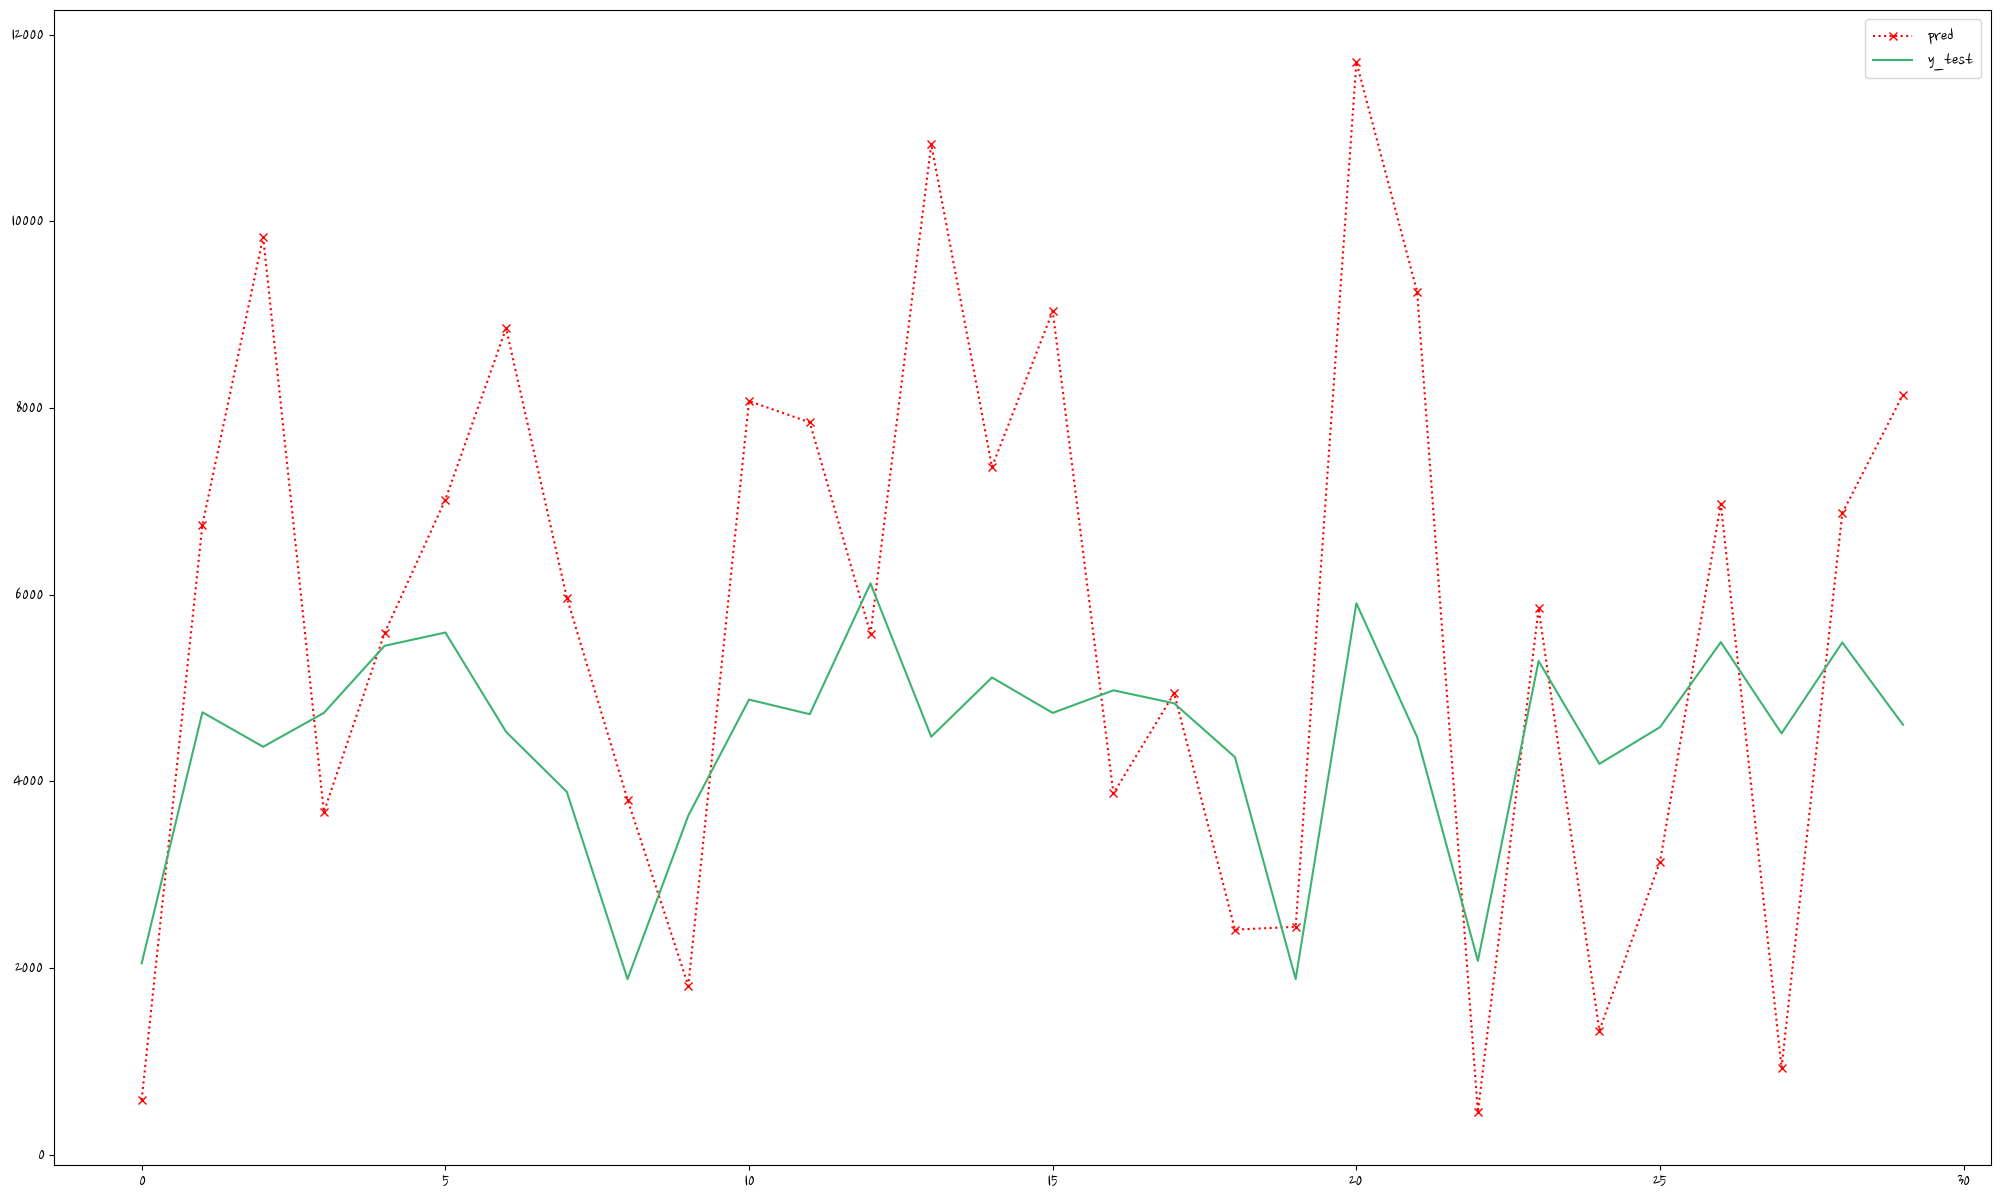

In [139]:
x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인



## cross_val_score
-  LinearReuniquession, Ridge, Lasso 교차검증


In [154]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [155]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [156]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.417 0.506 0.454 0.457 0.479]
LinearRegression cv 평균 rmse 값 : 0.462
Ridge cv rmse 값 리스트 : [0.418 0.505 0.453 0.455 0.479]
Ridge cv 평균 rmse 값 : 0.462
Lasso cv rmse 값 리스트 : [0.848 0.782 0.694 0.635 0.808]
Lasso cv 평균 rmse 값 : 0.753


## GridSearchCV
LinearReuniquession, Ridge, Lasso 하이퍼파라미터 조정

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [216]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.4501, 최적 alpha값:{'alpha': 20}


In [217]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.4498, 최적 alpha값:{'alpha': 0.001}


In [241]:




# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
pred =ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)
pred =lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


lr_reg MSE:  0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984
ridge_reg MSE: 0.16401428401989548, RMSE: 0.40498677017884854, R2: 0.7601045702781266
lasso_reg MSE: 0.16820515140453465, RMSE: 0.41012821337300687, R2: 0.7539747997026356


In [221]:
alphas=[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    print(np.mean(np.sqrt(neg_mse_scores * -1)))
    
# alpha가 100일때가 가장 좋은 점수

0.4624746547657971
0.4624709481939469
0.46245604077679986
0.46243756026036814
0.4621324074092241
0.46125912202871183
0.46095641095790063
0.46086756937048284
0.4608483362540218
0.4609231383738227
0.4612537521261218
0.4624010025470916
0.46390446533018725
0.46557955103573107
0.47427927870014075


IndexError: index 5 is out of bounds for axis 0 with size 5

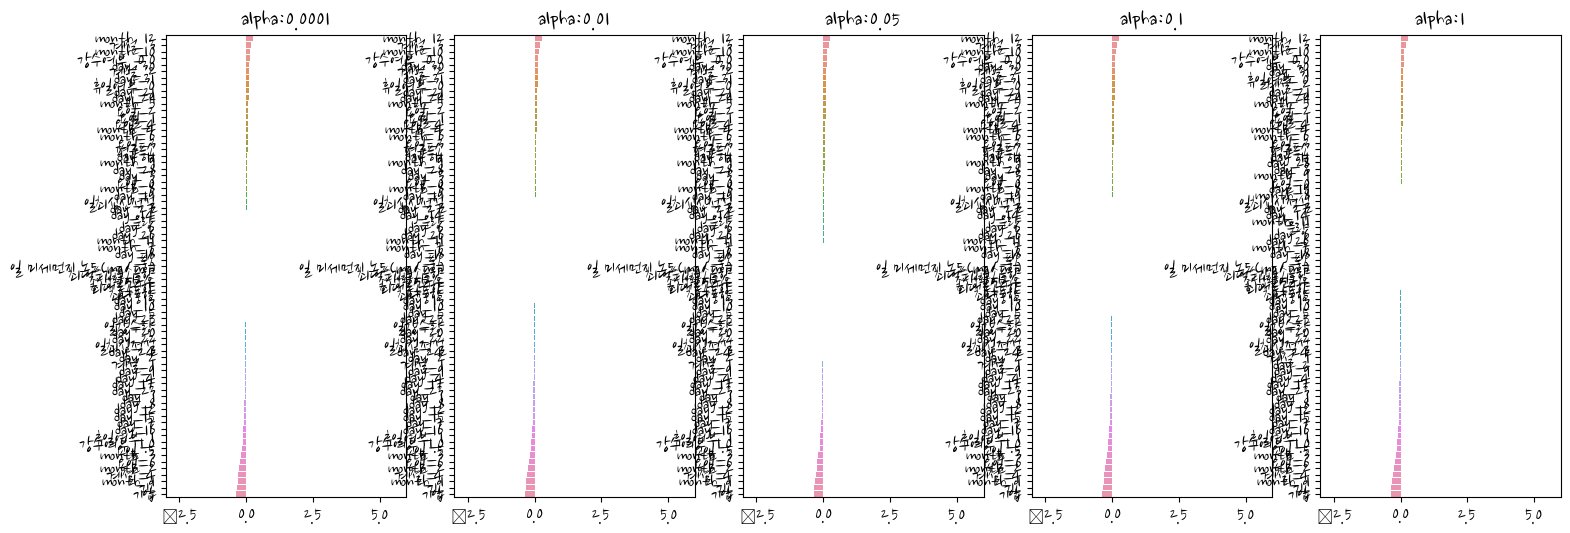

In [222]:
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(ridge.coef_, index=X.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show

In [229]:
def get_top_botton_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns) #회귀계수값 시리즈로 만들기
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [227]:
#회귀계수를 시각화
def visualize_coefficient(models):
    fig,axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout() #tight_layout() = 배치를 맞춰줌
    for i_num, model in enumerate(models): #i_num, model = index
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__+'Coefficient',size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120) #direction='in' 글자가 그래프 안에 들어와도 된다
        for lable in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            lable.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index, ax=axs[i_num]) #series라서 .values 사용

In [247]:
get_top_botton_coef(rf_reg)


NameError: name 'rf_reg' is not defined

In [ ]:
alphas=[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    print(np.mean(np.sqrt(neg_mse_scores * -1)))
    
# alpha가 100일때가 가장 좋은 점수

TypeError: 'LinearRegression' object is not iterable

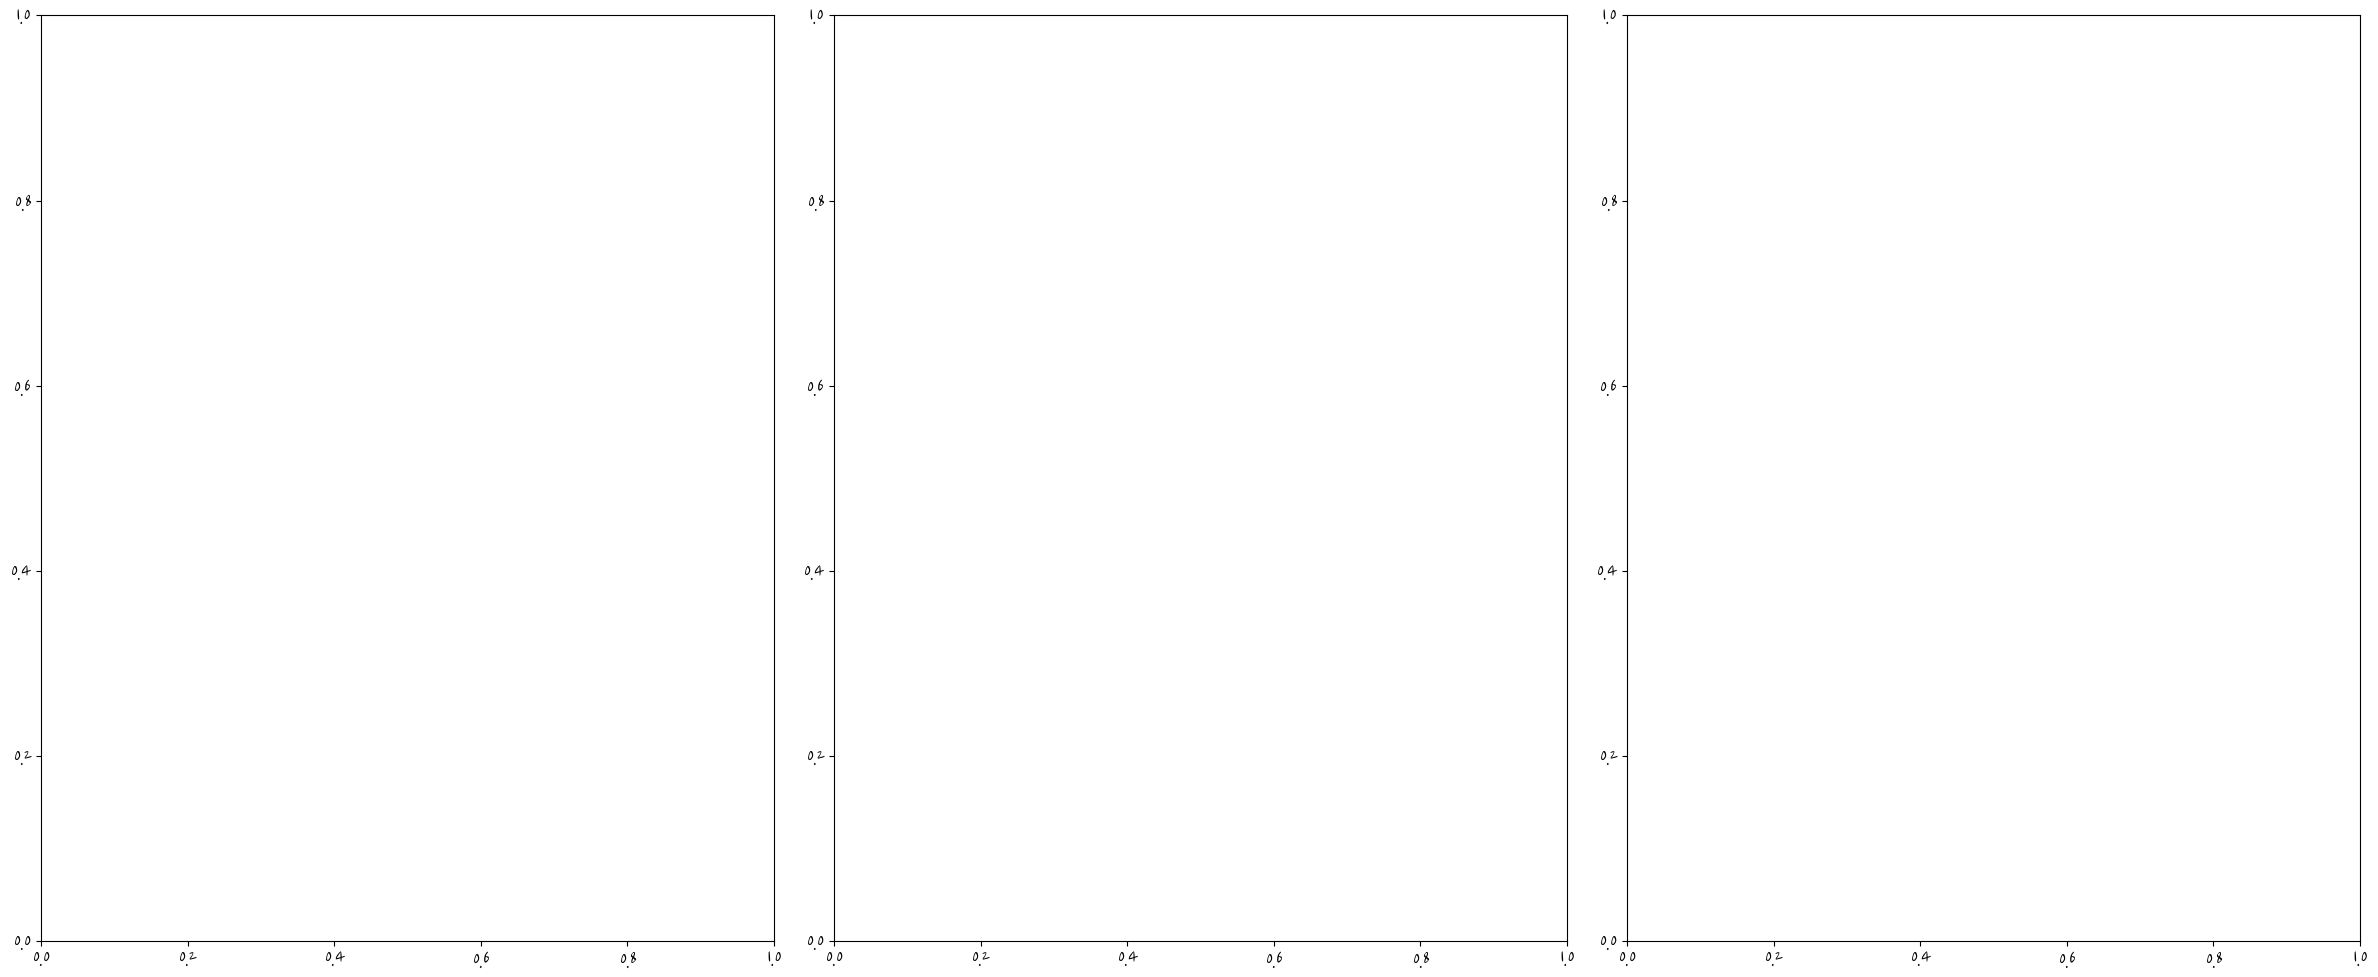

In [239]:
visualize_coefficient(lr_reg)

# RandomForestRegressor

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [243]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [244]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [245]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.12283794091253145, RMSE: 0.35048244023421693, R2: 0.8203311327580028


In [255]:
np.expm1(0.35048244023421693)

0.4197523290433088

586.0000000000002, 671.7911075308609
6748.999999999997, 7909.558084522754
9834.000000000007, 7859.349792724786
3671.9999999999977, 2902.8830552716327
5590.0, 5436.44898408985
7018.0000000000055, 7687.130712277962
8853.999999999996, 8118.508250431018
5968.000000000004, 7254.461149581126
3804.9999999999986, 3622.283904942467
1807.9999999999995, 2291.8773146406957
8075.000000000005, 8229.473426126408
7847.0000000000055, 8284.954283250261
5581.999999999997, 7606.503192203516
10826.999999999998, 8396.98610520233
7369.0, 8327.415593974225
9038.999999999998, 6241.016551888531
3871.0000000000027, 3688.6465173299434
4944.000000000003, 6270.356085550953
2410.999999999999, 2778.820100448476
2441.0, 3047.63811752221
11707.00000000001, 9252.018688979782
9245.0, 8240.720259926678
455.00000000000017, 931.6561556162377
5853.000000000004, 7952.221550180198
1329.0000000000002, 1285.6152412914873
3141.0000000000005, 3820.630636448656
6975.000000000002, 7128.13995269143
930.0000000000001, 959.660738632712

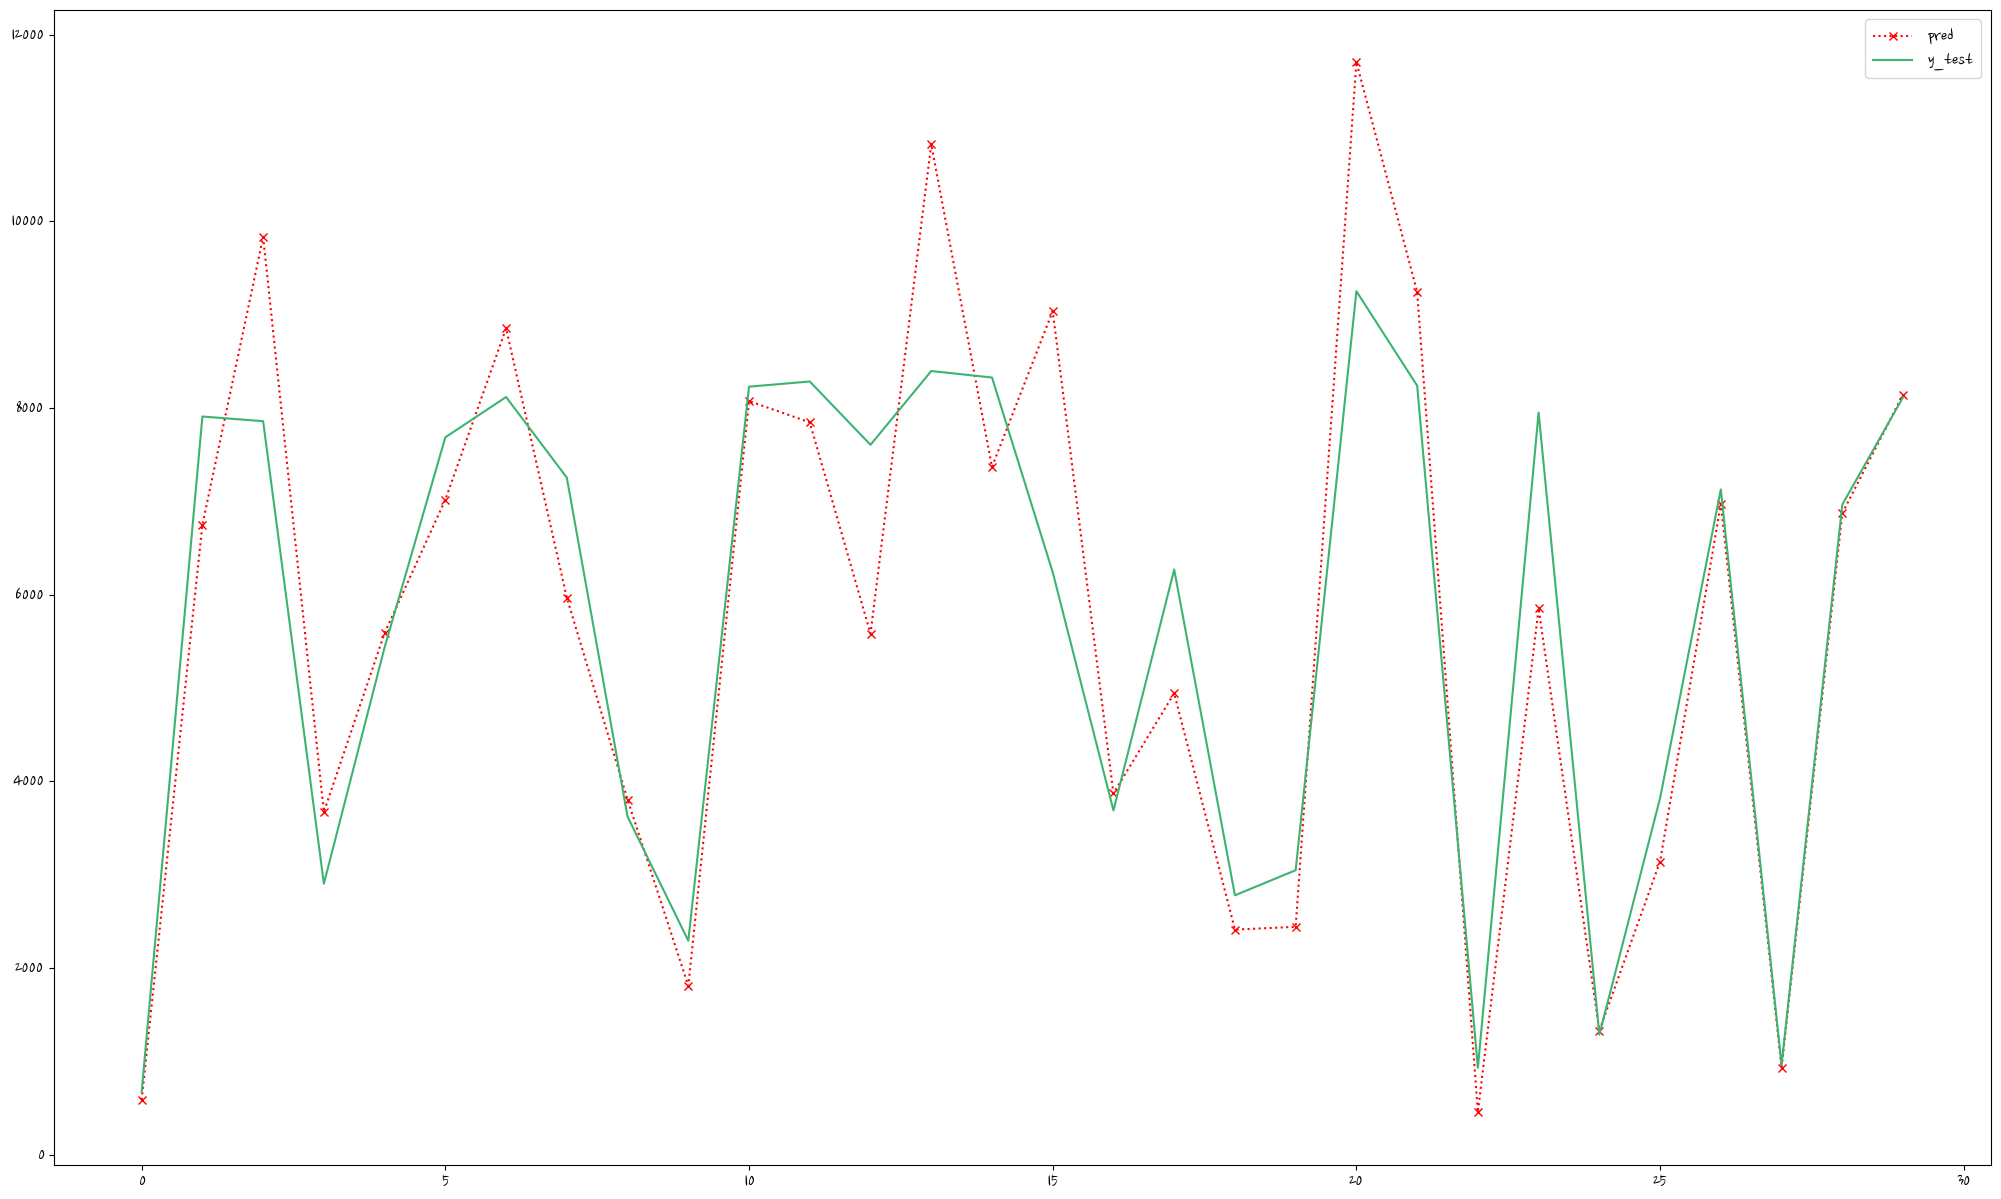

In [261]:
x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [164]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [165]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.11591028078606788, RMSE: 0.34045598949947686, R2: 0.8304638721894262


586.0000000000002, 693.4726235275998
6748.999999999997, 7854.780156137647
9834.000000000007, 8343.452647367942
3671.9999999999977, 2865.630367697921
5590.0, 5379.325786949045
7018.0000000000055, 7673.536756937968
8853.999999999996, 8422.23033473476
5968.000000000004, 6928.590135797657
3804.9999999999986, 3859.349403232808
1807.9999999999995, 2246.488032608873
8075.000000000005, 8335.800849543293
7847.0000000000055, 8098.357493218474
5581.999999999997, 7488.628108945757
10826.999999999998, 8666.83697488399
7369.0, 8290.576717513955
9038.999999999998, 6237.383856495245
3871.0000000000027, 3662.2376048135748
4944.000000000003, 6384.831274051382
2410.999999999999, 2772.0701864691655
2441.0, 3044.2234121322754
11707.00000000001, 10068.345983868554
9245.0, 8477.152658253888
455.00000000000017, 912.3176251657555
5853.000000000004, 7516.765373440896
1329.0000000000002, 1286.5037854038646
3141.0000000000005, 3737.027453156654
6975.000000000002, 7084.644604655653
930.0000000000001, 941.113822625

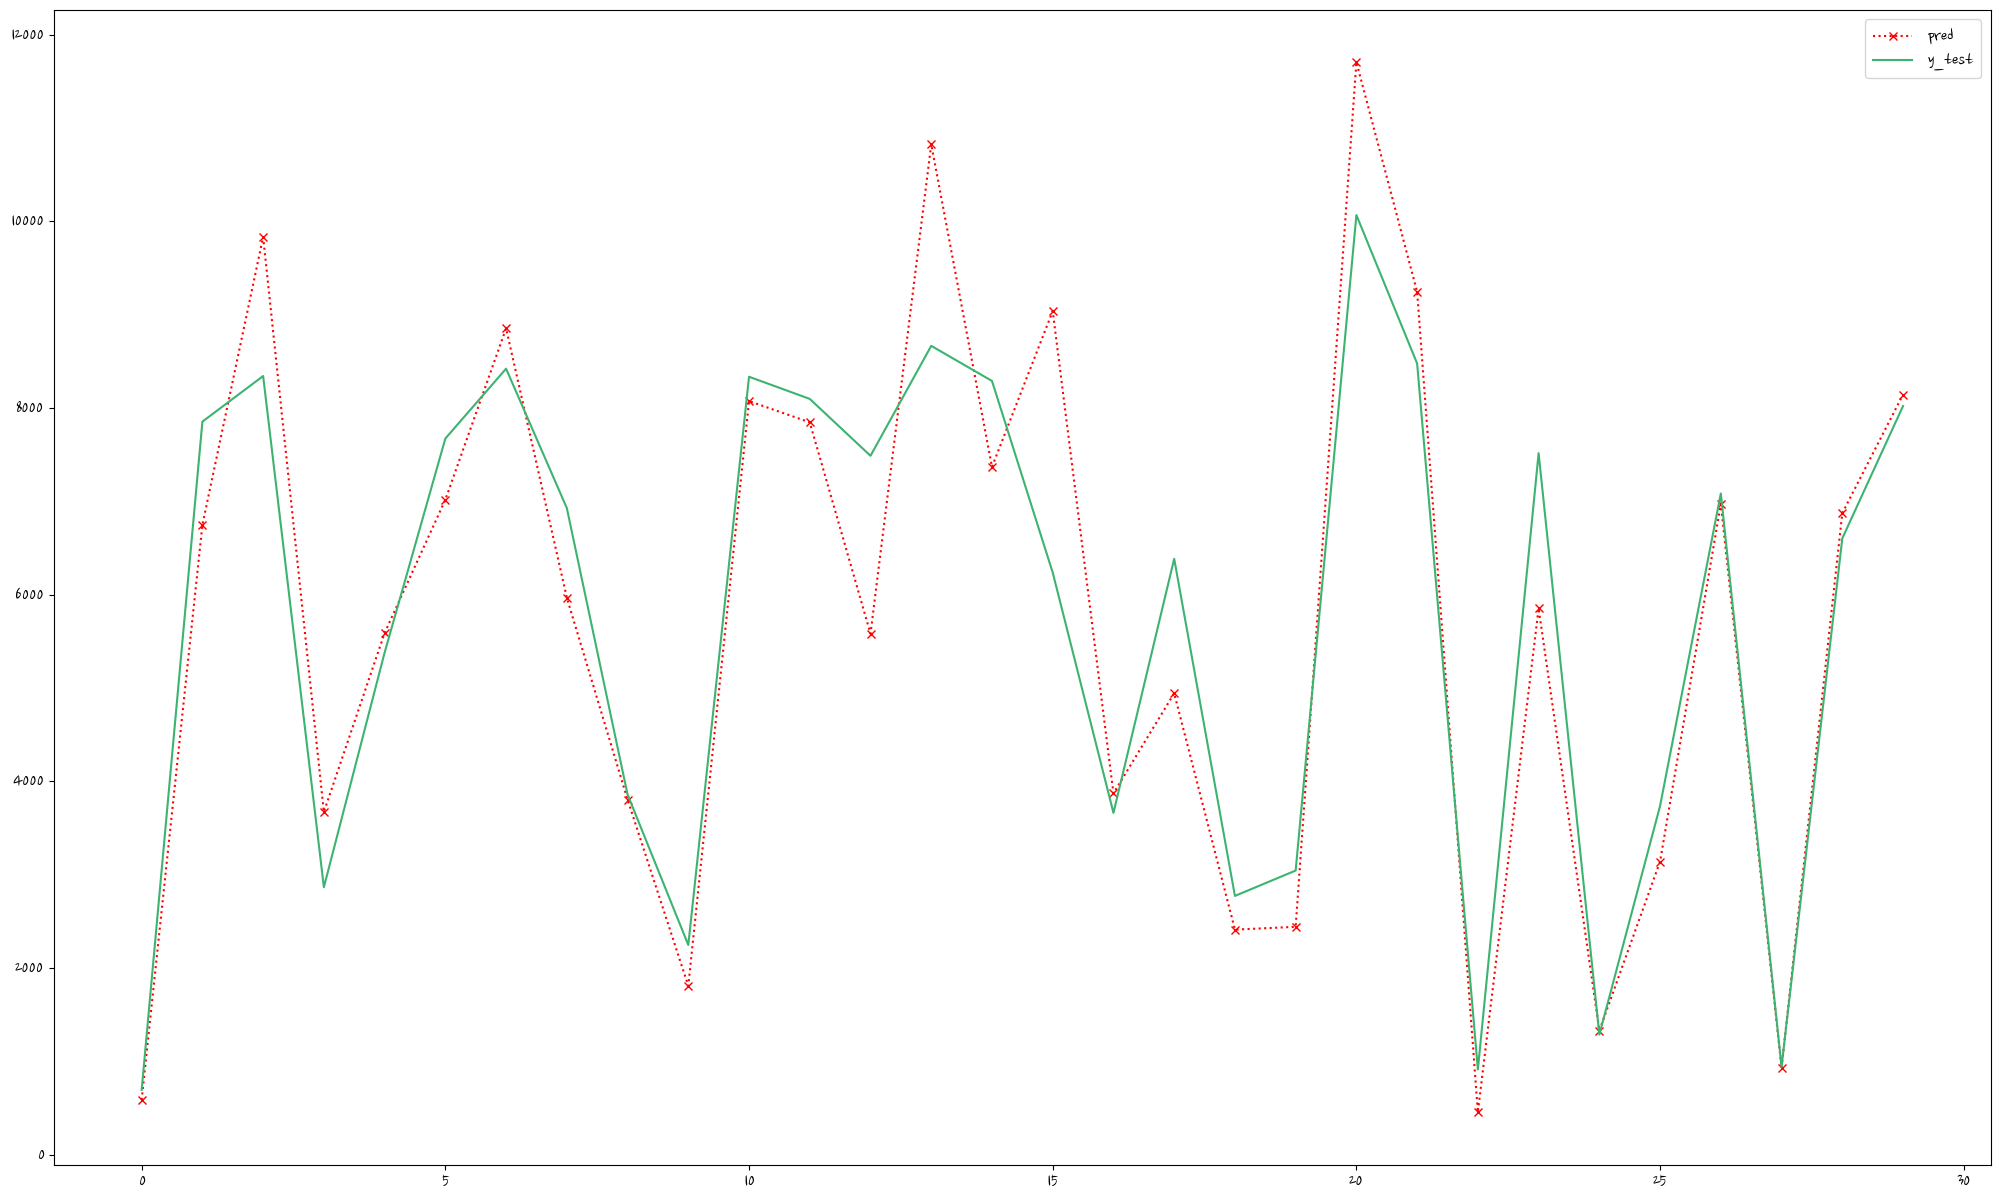

In [166]:
x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인

# XGBoost 

In [167]:
import xgboost as xgb
from xgboost import XGBRegressor

In [168]:
import xgboost

print(xgboost.__version__)

1.5.0


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [170]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [171]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [172]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [173]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [174]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:7.37034	eval-rmse:7.36276
[1]	train-rmse:7.00529	eval-rmse:7.00104
[2]	train-rmse:6.65851	eval-rmse:6.65743
[3]	train-rmse:6.32910	eval-rmse:6.33105
[4]	train-rmse:6.01596	eval-rmse:6.02216
[5]	train-rmse:5.71868	eval-rmse:5.72708
[6]	train-rmse:5.43613	eval-rmse:5.44651
[7]	train-rmse:5.16784	eval-rmse:5.17877
[8]	train-rmse:4.91275	eval-rmse:4.92722
[9]	train-rmse:4.67057	eval-rmse:4.68624
[10]	train-rmse:4.44061	eval-rmse:4.45670
[11]	train-rmse:4.22192	eval-rmse:4.24123
[12]	train-rmse:4.01426	eval-rmse:4.03686
[13]	train-rmse:3.81702	eval-rmse:3.84136
[14]	train-rmse:3.62969	eval-rmse:3.65690
[15]	train-rmse:3.45176	eval-rmse:3.47844
[16]	train-rmse:3.28270	eval-rmse:3.31142
[17]	train-rmse:3.12216	eval-rmse:3.15321
[18]	train-rmse:2.96971	eval-rmse:3.00060
[19]	train-rmse:2.82484	eval-rmse:2.85743
[20]	train-rmse:2.68718	eval-rmse:2.72049
[21]	train-rmse:2.55658	eval-rmse:2.59160
[22]	train-rmse:2.43258	eval-rmse:2.46757
[23]	train-rmse:2.31476	eval-rmse:2.35048
[2

In [175]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

586.0000000000002, 568.0326538085938
6748.999999999997, 8269.833984375
9834.000000000007, 8909.970703125
3671.9999999999977, 3101.2373046875
5590.0, 5303.5625
7018.0000000000055, 8317.859375
8853.999999999996, 7747.5
5968.000000000004, 8018.35693359375
3804.9999999999986, 3963.935791015625
1807.9999999999995, 2538.502685546875
8075.000000000005, 9215.9765625
7847.0000000000055, 8773.44140625
5581.999999999997, 6214.6708984375
10826.999999999998, 9053.8896484375
7369.0, 8774.4462890625
9038.999999999998, 7517.4306640625
3871.0000000000027, 3585.8271484375
4944.000000000003, 6913.9970703125
2410.999999999999, 2414.538818359375
2441.0, 3391.864501953125
11707.00000000001, 9480.138671875
9245.0, 7648.76708984375
455.00000000000017, 730.2327270507812
5853.000000000004, 6631.30322265625
1329.0000000000002, 309.8294677734375
3141.0000000000005, 3611.622314453125
6975.000000000002, 8399.16796875
930.0000000000001, 1239.98486328125
6874.000000000005, 7831.1845703125
8145.0, 8486.9912109375
8957

TypeError: booster must be Booster or LGBMModel.

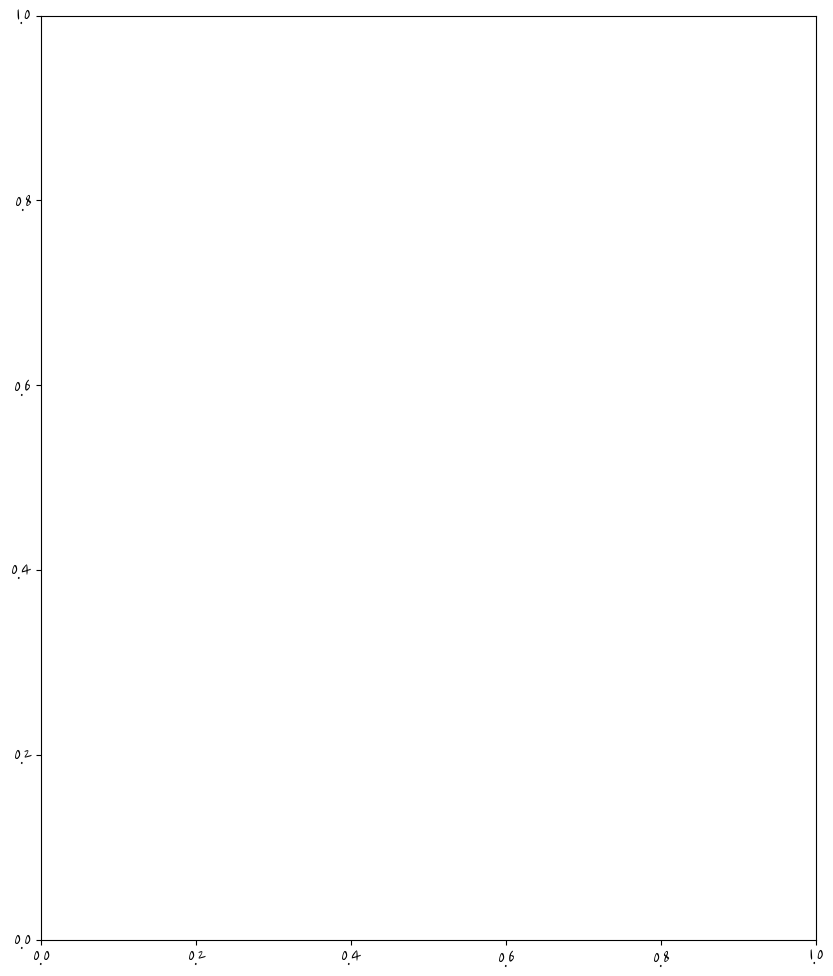

In [253]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgboost, ax=ax)
plt.savefig('myfigure.png', transparent = True)

# GBM

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [249]:
gb_ref = GradientBoostingRegressor(random_state=32)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

MSE: 0.12283794091253145
RMSE:  0.35
R2: 0.8203311327580028


In [178]:
params = {
    'max_depth':[3],
    'learning_rate':[0.05],
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [179]:
grid_cv = GridSearchCV(gb_ref, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE: ', np.round(mse,3))
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

{'learning_rate': 0.05, 'max_depth': 3}
0.8143609497947379
MSE:  0.131
RMSE:  0.361
R2: 0.8090403174312449


TypeError: booster must be Booster or LGBMModel.

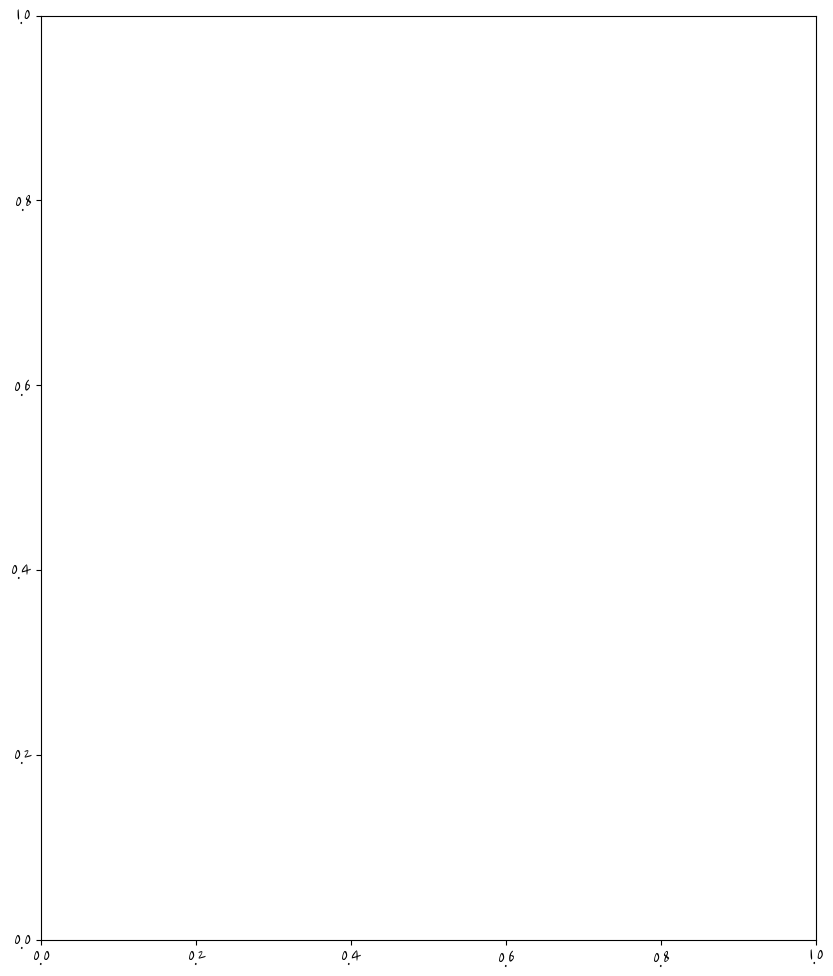

In [251]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(grid_cv, ax=ax)
plt.savefig('myfigure.png', transparent = True)

# LightGBM

In [180]:
from lightgbm import LGBMRegressor

In [181]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print('MSE: ', np.round(mse,3))
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

[1]	training's l2: 0.666447	valid_1's l2: 0.696316
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.61707	valid_1's l2: 0.650066
[3]	training's l2: 0.572415	valid_1's l2: 0.607367
[4]	training's l2: 0.531833	valid_1's l2: 0.571331
[5]	training's l2: 0.494959	valid_1's l2: 0.534772
[6]	training's l2: 0.461334	valid_1's l2: 0.504657
[7]	training's l2: 0.430049	valid_1's l2: 0.475325
[8]	training's l2: 0.402175	valid_1's l2: 0.448074
[9]	training's l2: 0.377113	valid_1's l2: 0.423734
[10]	training's l2: 0.353461	valid_1's l2: 0.402901
[11]	training's l2: 0.331773	valid_1's l2: 0.38118
[12]	training's l2: 0.312232	valid_1's l2: 0.363782
[13]	training's l2: 0.293738	valid_1's l2: 0.34657
[14]	training's l2: 0.277174	valid_1's l2: 0.332685
[15]	training's l2: 0.261436	valid_1's l2: 0.316519
[16]	training's l2: 0.247291	valid_1's l2: 0.302729
[17]	training's l2: 0.234549	valid_1's l2: 0.290169
[18]	training's l2: 0.222556	valid_1's l2: 0.278059
[19]	training'

### 피처 중요도

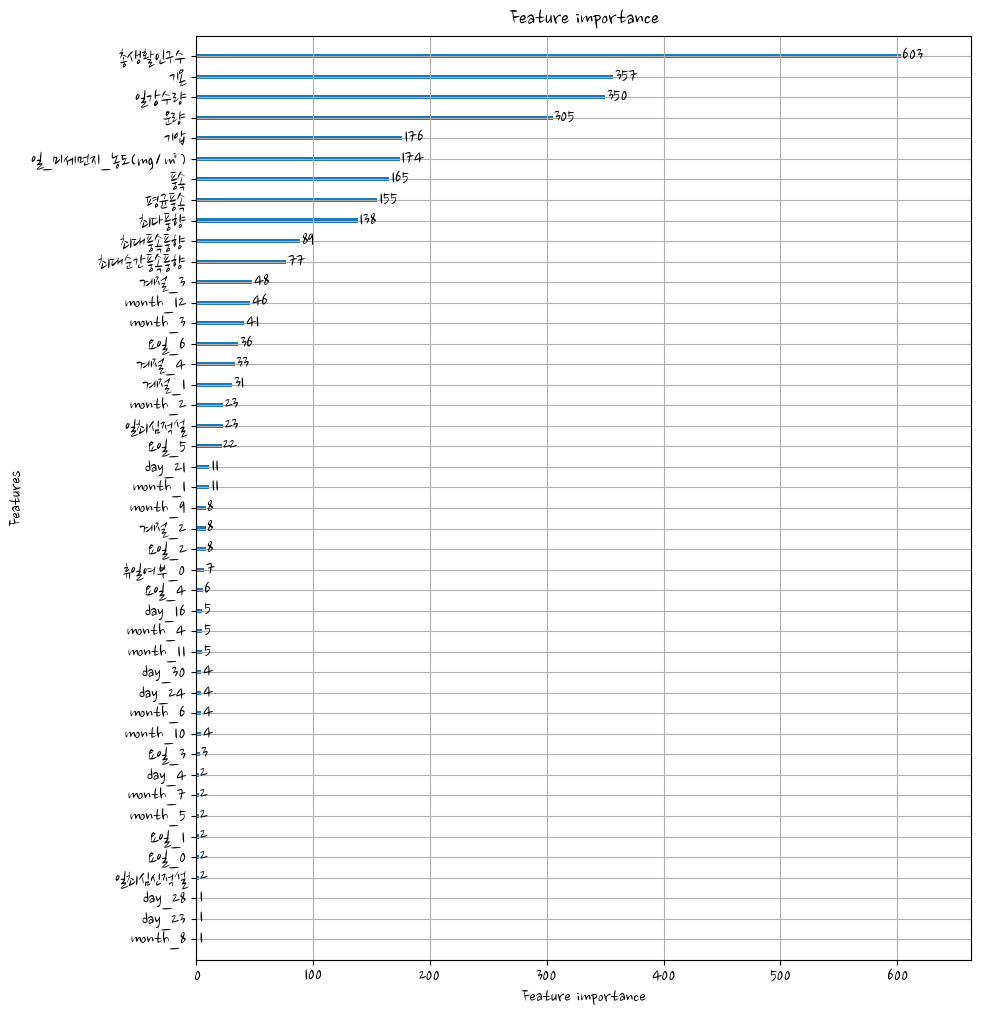

In [184]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)
plt.savefig('myfigure.png', transparent = True)

In [183]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

586.0000000000002, 572.1540297771314
6748.999999999997, 7926.735256791609
9834.000000000007, 8197.409350346943
3671.9999999999977, 2932.6120492299565
5590.0, 5556.841370218035
7018.0000000000055, 8006.445822891296
8853.999999999996, 7264.564893797185
5968.000000000004, 7142.612063669636
3804.9999999999986, 3718.7955680088744
1807.9999999999995, 2802.9464046388916
8075.000000000005, 8261.44823168887
7847.0000000000055, 8261.44823168887
5581.999999999997, 7756.459484385719
10826.999999999998, 8261.44823168887
7369.0, 8261.44823168887
9038.999999999998, 6971.0502143195345
3871.0000000000027, 3877.635571954733
4944.000000000003, 6601.692956243898
2410.999999999999, 2442.400892855495
2441.0, 3785.6088261887335
11707.00000000001, 8534.770942360195
9245.0, 7357.636280570603
455.00000000000017, 972.6652542726318
5853.000000000004, 7312.596232713964
1329.0000000000002, 695.6094999763158
3141.0000000000005, 3898.3067045491653
6975.000000000002, 8006.445822891296
930.0000000000001, 1497.517113695

# 2018_2021 회귀 결과  
- LinearReuniquession, Ridge, Lasso  
MSE: 0.14289231981722259, RMSE: 0.378011004889041, R2: 0.7909986031317261  
LinearRegression RMSE:  0.378  
Ridge RMSE:  0.379  
Lasso RMSE:  0.82  

- LinearReuniquession, Ridge, Lasso(GridSearchCV)  
MSE: 0.14289231981722259, RMSE: 0.378011004889041, R2: 0.7909986031317261  
LinearRegression RMSE:  0.378  
Ridge RMSE:  0.435  
Lasso RMSE:  0.421  


- RandomForestRegressor(log1p적용)  
MSE: 0.1230143675763507, RMSE: 0.35073404108576445, R2: 0.82007308236572  

- RandomForestRegressor(GridSearchCV)  
MSE: 0.11591986683961727, RMSE: 0.3404700674649936, R2: 0.830449851151872583  


- XGBoost    
MSE: 0.12232982213943464, RMSE: 0.3497568042789656, R2: 0.8210743324869181    

- GBM  
MSE: 0.118, RMSE:  0.361, R2: 0.8089568079535943   

- LightGBM  
MSE: 0.123, RMSE:  0.351, R2: 0.8193671430432468  

# 최종 결과  
MSE: RandomForestRegressor(GridSearchCV), MSE: 0.11  
RMSE: RandomForestRegressor(GridSearchCV), RMSE: 0.34  
R2: RandomForestRegressor(GridSearchCV), R2: 0.83  